In [1]:
import numpy as np
import pandas as pd
import re

In [2]:
data_main = pd.read_csv('IMDB Dataset.csv', sep=',')
data = data_main.sample(n = 5000, random_state = 0)
data

,review,sentiment
11841,John Cassavetes is on the run from the law. He...,positive
19602,It's not just that the movie is lame. It's mor...,negative
45519,"Well, if it weren't for Ethel Waters and a 7-y...",negative
25747,I find Alan Jacobs review very accurate concer...,positive
42642,This movie is simply awesome. It is so hilario...,positive
...,...,...
9869,This is an excellent movie that tackles the is...,positive
42192,i was kinda interested in this movie as a tras...,negative
12143,I think I am some kind of Road Runner fan. I d...,positive
34963,Two years passed and mostly everyone looks dif...,positive


## Cleaning the text

In [3]:
# Figuring out stop words, words that are not useful and are common in all the text documents
from nltk.corpus import stopwords
import string
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
stop_words = stopwords.words('english')
stop_words += list(string.punctuation)
stop_words

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [4]:
def cleaning_text(s):
    text_string = re.sub(r'[^a-zA-Z\s]', '', s, re.I|re.A).strip()
    token_string = word_tokenize(text_string)
    ps = PorterStemmer()
    token_string_stem = [ps.stem(w) for w in token_string if w not in stop_words]
    return ' '.join(token_string_stem)

In [5]:
import time
start_time = time.time()
data['review'] = data['review'].apply(cleaning_text)
end_time = time.time()
print('Time Taken = ', end_time-start_time, 'seconds')

Time Taken =  37.06062293052673 seconds


In [6]:
data['sentiment'] = data['sentiment'].apply(lambda s: int(s == 'positive'))
data

,review,sentiment
11841,john cassavet run law He bottom heap He see ne...,1
19602,it movi lame it thi movi unnecessari Do need a...,0
45519,well werent ethel water yearold sammi davi Jr ...,0
25747,I find alan jacob review accur concern movieho...,1
42642,thi movi simpli awesom It hilari although skat...,1
...,...,...
9869,thi excel movi tackl issu racism delic balanc ...,1
42192,kinda interest movi trashi cannib flick thorou...,0
12143,I think I kind road runner fan I dont care pre...,1
34963,two year pass mostli everyon look differ good ...,1


In [7]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [8]:
train, test = train_test_split(data, test_size=0.2, random_state = 0)
train

,review,sentiment
25830,the often regard golden age british televis co...,1
34027,I give movi vampir assassin rate mainli sex nu...,0
37378,there mani thing fall aro tolbukhin En la ment...,1
23360,thi complic stori begin fairli simpli english ...,1
49853,A european musician compos set captur music di...,1
...,...,...
33530,I believ slant jingoist materi get pass americ...,0
16729,thi movi rent friend her choic normal good I r...,0
33642,A british teen movi centr around girl justin a...,0
10195,I gave film I saw If dont see I give thi movi ...,0


In [9]:
test

,review,sentiment
17259,it amaz good though wonder film made back earl...,1
44995,I watch movi first time week ago It quit possi...,0
35249,when I saw movi first long ago vhsvideo I like...,1
29535,sure well shot made well shot made but stori w...,1
28607,It interest entertain movi well worth watch th...,1
...,...,...
41587,ive seen terribl booktofilm adapt day one top ...,0
20139,As true canadian I alway avoid canadian movi h...,0
12656,capit citi fan rejoic thi first season seri av...,1
906,thi one favorit betti white lesli neilson spar...,1


In [10]:
cv = CountVectorizer(max_features = 2500)

In [11]:
train_mat = cv.fit_transform(train['review'].values)

In [12]:
test_mat = cv.transform(test['review'].values)

In [13]:
cv.get_feature_names()

['abandon',
 'abil',
 'abl',
 'about',
 'absolut',
 'absurd',
 'abus',
 'abysm',
 'academi',
 'accent',
 'accept',
 'access',
 'accid',
 'accident',
 'accompani',
 'accomplish',
 'accord',
 'account',
 'accur',
 'accus',
 'achiev',
 'across',
 'act',
 'action',
 'activ',
 'actor',
 'actress',
 'actual',
 'ad',
 'adam',
 'adapt',
 'add',
 'addict',
 'addit',
 'address',
 'admir',
 'admit',
 'adopt',
 'ador',
 'adult',
 'advanc',
 'advantag',
 'adventur',
 'advertis',
 'advic',
 'advis',
 'affair',
 'affect',
 'afford',
 'afraid',
 'african',
 'after',
 'afternoon',
 'again',
 'age',
 'agent',
 'ago',
 'agre',
 'ahead',
 'aid',
 'aim',
 'air',
 'aka',
 'al',
 'ala',
 'alan',
 'albeit',
 'albert',
 'alcohol',
 'alex',
 'alic',
 'alien',
 'aliv',
 'all',
 'allbr',
 'allen',
 'allow',
 'almost',
 'alon',
 'along',
 'alreadi',
 'also',
 'alter',
 'altern',
 'although',
 'alway',
 'amanda',
 'amateur',
 'amateurish',
 'amaz',
 'amazingli',
 'america',
 'american',
 'among',
 'amount',
 'amus'

## Training and Testing the data

### Weighted Sums

In [14]:
def ww_fit(train):
    word_sentiment = {}
    for index, row in train.iterrows():
        line ,sentiment = row['review'],row['sentiment']
        for word in line.split():
            try: # Increment weight of the word by 1 if positive, decrement weight by 1 if negative
                word_sentiment[word][0] = word_sentiment[word][0] + 1 if int(sentiment) == 1 else word_sentiment[word][0] - 1
            except: # If word doesn't exist, create new entry in dictionary
                word_sentiment[word] = [1, 0] if int(sentiment) == 1 else [-1, 0]
            finally: # Increment number of occurences of the word; used later to compute the weighted sum instead of just sum
                word_sentiment[word][1] += 1
    word_weighted_sentiment = {word: word_sentiment[word][0] / word_sentiment[word][1] for word in word_sentiment.keys()}
    # Weighted sum of the sentiment of each word (divide weight of the word by number of occurences of the word)
    return word_weighted_sentiment

In [15]:
def ww_predict(test, word_weighted_sentiment):
    ww_y_pred = []
    for data in test['review'].values:
        words = data.split()
        sentiment = 0
        for word in words:
            try:
                sentiment += word_weighted_sentiment[word] # Compute sum of weighted sentiments of the words in the review
            except:
                sentiment += 0 # MISSING WORDS (words in testing data but not training data) ARE GIVEN SENTIMENT OF 0
        if sentiment >= 0:
            ww_y_pred.append(1)
        else:
            ww_y_pred.append(0)
    return np.array(ww_y_pred)

In [16]:
ww_dict = ww_fit(train)

In [17]:
ww_y_pred = ww_predict(test,ww_dict)

In [18]:
print('Confusion Matrix :')
print(metrics.confusion_matrix(test['sentiment'].values, ww_y_pred, labels = [0, 1]))

Confusion Matrix :
[[444  60]
 [158 338]]


In [19]:
ww_accuracy = metrics.accuracy_score(test['sentiment'].values, ww_y_pred)
print('Accuracy Score',ww_accuracy)

Accuracy Score 0.782


In [20]:
ww_precision, ww_recall, ww_f, ww_support= metrics.precision_recall_fscore_support(test['sentiment'].values, ww_y_pred, average = 'binary',labels = [0, 1])
print('Precision', ww_precision)
print('Recall', ww_recall)
print('F Score', ww_f)

Precision 0.8492462311557789
Recall 0.6814516129032258
F Score 0.756152125279642


### 'Multinomial' Naive Bayes

In [21]:
from sklearn.naive_bayes import MultinomialNB

In [22]:
NBClassifer = MultinomialNB()

In [23]:
NBClassifer.fit(train_mat, train['sentiment'].values)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [24]:
NB_y_pred = NBClassifer.predict(test_mat)

In [25]:
print('Confusion Matrix :')
print(metrics.confusion_matrix(test['sentiment'].values, NB_y_pred, labels = [0, 1]))

Confusion Matrix :
[[425  79]
 [101 395]]


In [26]:
NB_accuracy = metrics.accuracy_score(test['sentiment'].values, NB_y_pred)
print('Accuracy Score',NB_accuracy)

Accuracy Score 0.82


In [27]:
NB_precision, NB_recall, NB_f, NB_support= metrics.precision_recall_fscore_support(test['sentiment'].values, NB_y_pred, average = 'binary',labels = [0, 1])
print('Precision', NB_precision)
print('Recall', NB_recall)
print('F Score', NB_f)

Precision 0.8333333333333334
Recall 0.7963709677419355
F Score 0.8144329896907216


### Support Vector Machine (SVM)

In [28]:
from sklearn.svm import SVC

In [29]:
SVClassifer = SVC(gamma = 'scale')

In [30]:
SVClassifer.fit(train_mat, train['sentiment'].values)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [31]:
SVC_y_pred = SVClassifer.predict(test_mat)

In [32]:
print('Confusion Matrix :')
print(metrics.confusion_matrix(test['sentiment'].values, SVC_y_pred, labels = [0, 1]))

Confusion Matrix :
[[419  85]
 [ 94 402]]


In [33]:
SVC_accuracy = metrics.accuracy_score(test['sentiment'].values, SVC_y_pred)
print('Accuracy Score',SVC_accuracy)

Accuracy Score 0.821


In [34]:
SVC_precision, SVC_recall, SVC_f, SVC_support= metrics.precision_recall_fscore_support(test['sentiment'].values, SVC_y_pred, average = 'binary',labels = [0, 1])
print('Precision', SVC_precision)
print('Recall', SVC_recall)
print('F Score', SVC_f)

Precision 0.8254620123203286
Recall 0.8104838709677419
F Score 0.8179043743641913


### K-Nearest Neighbour

In [35]:
from sklearn.neighbors import KNeighborsClassifier

In [36]:
KNNClassifier = KNeighborsClassifier()

In [37]:
KNNClassifier.fit(train_mat, train['sentiment'].values)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [38]:
KNN_y_pred = KNNClassifier.predict(test_mat)

In [39]:
print('Confusion Matrix :')
print(metrics.confusion_matrix(test['sentiment'].values, KNN_y_pred, labels = [0, 1]))

Confusion Matrix :
[[322 182]
 [211 285]]


In [40]:
KNN_accuracy = metrics.accuracy_score(test['sentiment'].values, KNN_y_pred)
print('Accuracy Score',KNN_accuracy)

Accuracy Score 0.607


In [41]:
KNN_precision, KNN_recall, KNN_f, KNN_support= metrics.precision_recall_fscore_support(test['sentiment'].values, KNN_y_pred, average = 'binary',labels = [0, 1])
print('Precision', KNN_precision)
print('Recall', KNN_recall)
print('F Score', KNN_f)

Precision 0.6102783725910065
Recall 0.5745967741935484
F Score 0.5919003115264798


### Logistic Regression

In [42]:
from sklearn.linear_model import LogisticRegression

In [43]:
LogClassifier = LogisticRegression(solver = 'liblinear')

In [44]:
LogClassifier.fit(train_mat, train['sentiment'].values)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [45]:
Log_y_pred = LogClassifier.predict(test_mat)

In [46]:
print('Confusion Matrix :')
print(metrics.confusion_matrix(test['sentiment'].values, Log_y_pred, labels = [0, 1]))

Confusion Matrix :
[[414  90]
 [110 386]]


In [47]:
Log_accuracy = metrics.accuracy_score(test['sentiment'].values, Log_y_pred)
print('Accuracy Score',Log_accuracy)

Accuracy Score 0.8


In [48]:
Log_precision, Log_recall, Log_f, Log_support= metrics.precision_recall_fscore_support(test['sentiment'].values, Log_y_pred, average = 'binary', labels = [0, 1])
print('Precision', Log_precision)
print('Recall', Log_recall)
print('F Score', Log_f)

Precision 0.8109243697478992
Recall 0.7782258064516129
F Score 0.7942386831275721


## Graph to compare

In [49]:
import matplotlib.pyplot as plt

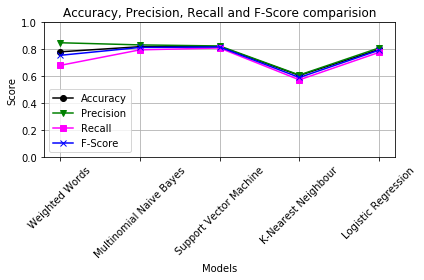

In [50]:
models = np.array(['Weighted Words', 'Multinomial Naive Bayes', 'Support Vector Machine', 'K-Nearest Neighbour', 'Logistic Regression'])
plt.plot(models, [ww_accuracy,NB_accuracy,SVC_accuracy,KNN_accuracy,Log_accuracy], 
        color = 'k',marker='o',label = 'Accuracy')
plt.plot(models, [ww_precision,NB_precision,SVC_precision,KNN_precision,Log_precision], 
        color = 'green',marker='v',label = 'Precision')
plt.plot(models, [ww_recall,NB_recall,SVC_recall,KNN_recall,Log_recall], 
        color = 'magenta',marker='s',label = 'Recall')
plt.plot(models, [ww_f,NB_f,SVC_f,KNN_f,Log_f], 
        color = 'blue',marker='x',label = 'F-Score')
plt.xlabel("Models")
plt.ylabel("Score")
plt.title("Accuracy, Precision, Recall and F-Score comparision")
plt.legend()
plt.grid()
plt.xticks(rotation = 45)
plt.ylim(0, 1)
plt.tight_layout()
plt.savefig('destination_path.svg', format='svg', dpi = 300)
plt.show()